# Partial dependency plots of the features of the ML models

This notebook plots the partial dependencies of each features of the training set, for both the machine learning models we trained in the previous exercises. These plots give an intuitive explanation of the models, and are a useful tool to understand how the models work.

_time 3m_

_Input: ML model from N4, ML model from N7, AGB vector from N1, LBand and PBand vector from N3, LVIS vector from N6_

## 1. Import modules

In [1]:
import plant
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os import path

from joblib import load
from sklearn.inspection import plot_partial_dependence

%matplotlib inline

## 2. Global variables

In [2]:
from config import *

In [3]:
training_LHH = plant.read_image(training_LHH_file).image
training_LHV = plant.read_image(training_LHV_file).image
training_LVV = plant.read_image(training_LVV_file).image
training_PHV = plant.read_image(training_PHV_file).image
training_lvis = plant.read_image(training_lvis_file).image

training_agb = plant.read_image(training_agb_file).image

opening: /projects/D3/dat/lband/rtc/output/n4/LHH_vect.tiff (GDAL: GTiff) 
opening: /projects/D3/dat/lband/rtc/output/n4/LHV_vect.tiff (GDAL: GTiff) 
opening: /projects/D3/dat/lband/rtc/output/n4/LVV_vect.tiff (GDAL: GTiff) 
opening: /projects/D3/dat/pband/output/n4/PHV_vect.tiff (GDAL: GTiff) 
opening: /projects/D3/dat/lvis/output/zt_m_zg_20_vect.tiff (GDAL: GTiff) 
opening: /projects/D3/dat/field/output/agb_vect.tiff (GDAL: GTiff) 


## 3. Partial dependency plots of the ML model with L and PBand only

In [4]:
training_df = pd.DataFrame({'LHH': training_LHH.flatten(), 
                            'LHV': training_LHV.flatten(),
                            'LVV': training_LVV.flatten(),
                            'PHV': training_PHV.flatten(),
                            'agb': training_agb.flatten()
                           })

In [5]:
training_df.drop(training_df.loc[training_df['PHV']==0].index, inplace=True)

In [6]:
training_df.dropna(inplace=True)
training_df['LHV'] = 10*np.log10(training_df['LHV'])
training_df['LHH'] = 10*np.log10(training_df['LHH'])
training_df['LVV'] = 10*np.log10(training_df['LVV'])
training_df['PHV'] = 10*np.log10(training_df['PHV'])
training_df.describe()

LHH         LHV         LVV         PHV         agb
count  143.000000  143.000000  143.000000  143.000000  143.000000
mean    -8.741404  -15.206789   -9.497608  -16.684679  186.964594
std      3.286808    5.051626    3.160932    5.762064  151.468725
min    -17.212464  -26.989700  -16.197888  -30.000000    0.018000
25%    -10.783836  -18.860566  -12.676062  -20.457575    5.090000
50%     -7.212464  -12.291480   -7.904850  -13.872161  221.785000
75%     -6.364043  -11.674911   -7.270003  -12.596373  314.808500
max     -5.228787  -10.604807   -6.003263   -9.871628  443.842000

In [7]:
X = training_df[[col for col in training_df.columns if col not in ['agb']]]
y = training_df['agb']

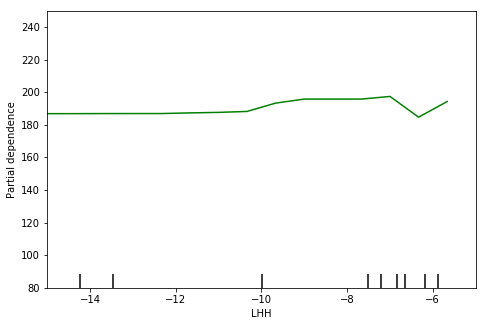

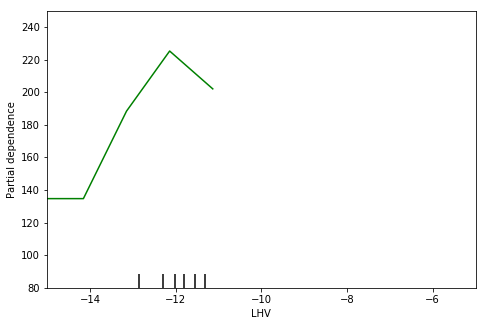

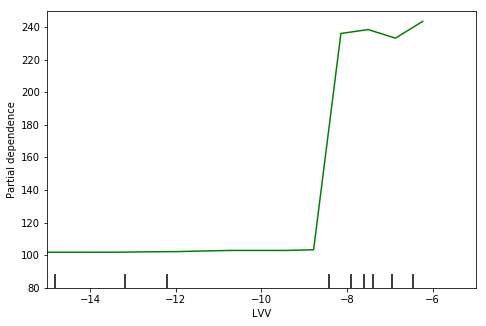

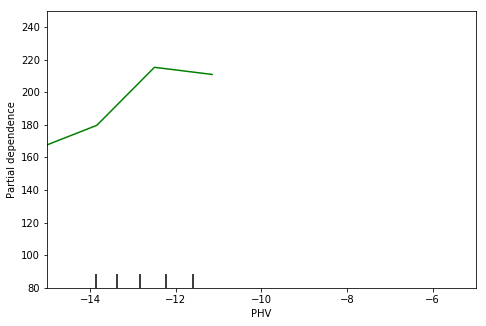

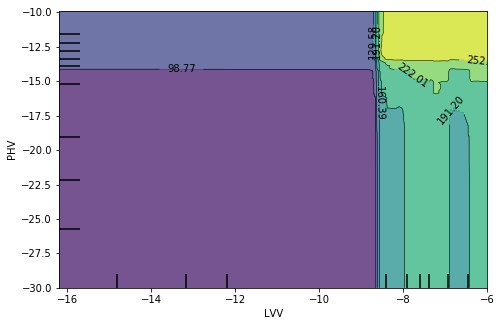

In [8]:
model = load(model_file_lp)
plt_xmin = -15
plt_xmax = -5
plt_ymin = 80
plt_ymax = 250
fig_size = (7,7)
resolution = 15

fig = plt.figure(figsize=fig_size)
plot_partial_dependence(model, X,
                       features=[0],
                       feature_names=X.columns,
                       fig=fig,
                       grid_resolution=resolution)
axes = plt.gca()
_ = axes.set_xlim([plt_xmin, plt_xmax])
_ = axes.set_ylim([plt_ymin, plt_ymax])

fig = plt.figure(figsize=fig_size)
plot_partial_dependence(model, X,
                       features=[1],
                       feature_names=X.columns,
                       fig=fig,
                       grid_resolution=resolution)
axes = plt.gca()
_ = axes.set_xlim([plt_xmin, plt_xmax])
_ = axes.set_ylim([plt_ymin, plt_ymax])

fig = plt.figure(figsize=fig_size)
plot_partial_dependence(model, X,
                       features=[2],
                       feature_names=X.columns,
                       fig=fig,
                       grid_resolution=resolution)
axes = plt.gca()
_ = axes.set_xlim([plt_xmin, plt_xmax])
_ = axes.set_ylim([plt_ymin, plt_ymax])

fig = plt.figure(figsize=fig_size)
plot_partial_dependence(model, X,
                       features=[3],
                       feature_names=X.columns,
                       fig=fig,
                       grid_resolution=resolution)
axes = plt.gca()
_ = axes.set_xlim([plt_xmin, plt_xmax])
_ = axes.set_ylim([plt_ymin, plt_ymax])

fig = plt.figure(figsize=fig_size)
plot_partial_dependence(model, X,
                       features=[(2,3)],
                       feature_names=X.columns,
                       fig=fig,
                       n_jobs=-1)

## 4. Partial dependency plots of the ML model with lidar, L and PBand

In [15]:
training_df = pd.DataFrame({'LHH': training_LHH.flatten(), 
                            'LHV': training_LHV.flatten(),
                            'LVV': training_LVV.flatten(),
                            'PHV': training_PHV.flatten(),
                            'agb': training_agb.flatten(),
                            'lvis': training_lvis.flatten()
                           })

In [10]:
training_df.drop(training_df.loc[training_df['PHV']==0].index, inplace=True)

In [11]:
training_df.dropna(inplace=True)
training_df['LHV'] = 10*np.log10(training_df['LHV'])
training_df['LHH'] = 10*np.log10(training_df['LHH'])
training_df['LVV'] = 10*np.log10(training_df['LVV'])
training_df['PHV'] = 10*np.log10(training_df['PHV'])
training_df.describe()

LHH         LHV         LVV         PHV         agb        lvis
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000
mean    -8.741404  -15.206789   -9.497608  -16.684679  186.964594   27.069860
std      3.286808    5.051626    3.160932    5.762064  151.468725   16.345758
min    -17.212464  -26.989700  -16.197888  -30.000000    0.018000    2.636000
25%    -10.783836  -18.860566  -12.676062  -20.457575    5.090000    8.336000
50%     -7.212464  -12.291480   -7.904850  -13.872161  221.785000   36.366000
75%     -6.364043  -11.674911   -7.270003  -12.596373  314.808500   39.797500
max     -5.228787  -10.604807   -6.003263   -9.871628  443.842000   48.506000

In [12]:
X = training_df[[col for col in training_df.columns if col not in ['agb']]]
y = training_df['agb']

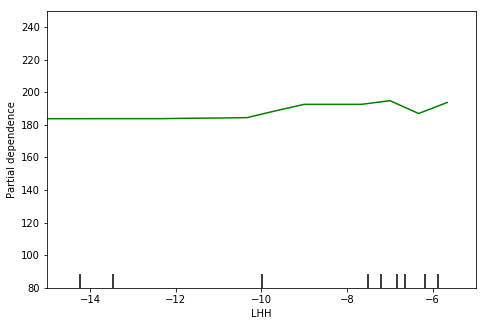

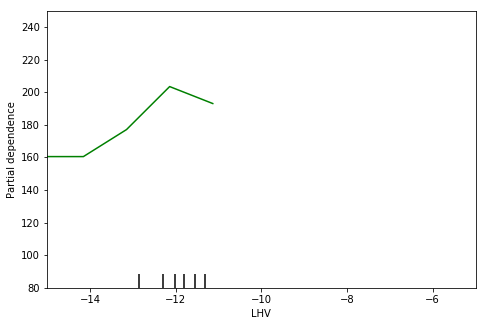

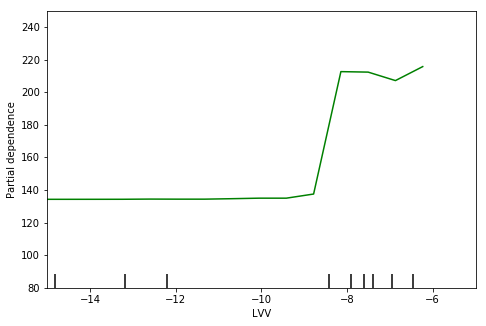

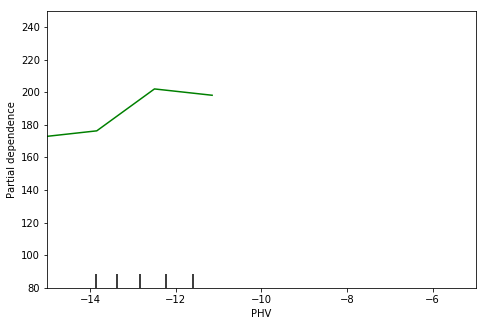

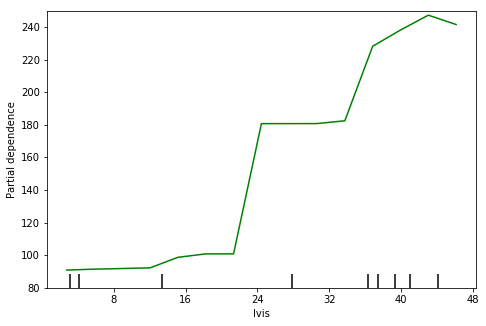

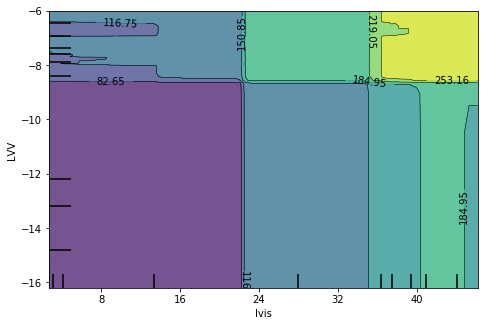

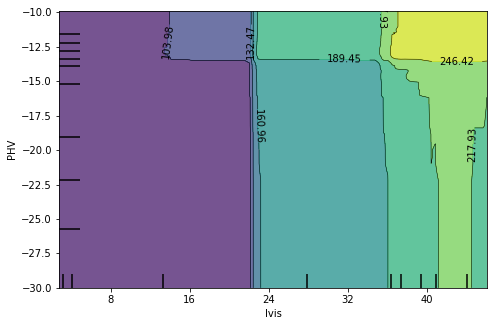

In [13]:
model_with_lvis = load(model_file_lplid)
plt_xmin = -15
plt_xmax = -5
plt_ymin = 80
plt_ymax = 250
fig_size = (7,7)
resolution = 15

fig = plt.figure(figsize=fig_size)
plot_partial_dependence(model_with_lvis, X,
                       features=[0],
                       feature_names=X.columns,
                       fig=fig,
                       grid_resolution=resolution)
axes = plt.gca()
_ = axes.set_xlim([plt_xmin, plt_xmax])
_ = axes.set_ylim([plt_ymin, plt_ymax])

fig = plt.figure(figsize=fig_size)
plot_partial_dependence(model_with_lvis, X,
                       features=[1],
                       feature_names=X.columns,
                       fig=fig,
                       grid_resolution=resolution)
axes = plt.gca()
_ = axes.set_xlim([plt_xmin, plt_xmax])
_ = axes.set_ylim([plt_ymin, plt_ymax])

fig = plt.figure(figsize=fig_size)
plot_partial_dependence(model_with_lvis, X,
                       features=[2],
                       feature_names=X.columns,
                       fig=fig,
                       grid_resolution=resolution)
axes = plt.gca()
_ = axes.set_xlim([plt_xmin, plt_xmax])
_ = axes.set_ylim([plt_ymin, plt_ymax])

fig = plt.figure(figsize=fig_size)
plot_partial_dependence(model_with_lvis, X,
                       features=[3],
                       feature_names=X.columns,
                       fig=fig,
                       grid_resolution=resolution)
axes = plt.gca()
_ = axes.set_xlim([plt_xmin, plt_xmax])
_ = axes.set_ylim([plt_ymin, plt_ymax])

fig = plt.figure(figsize=fig_size)
plot_partial_dependence(model_with_lvis, X,
                       features=[4],
                       feature_names=X.columns,
                       fig=fig,
                       grid_resolution=resolution)
axes = plt.gca()
_ = axes.set_ylim([plt_ymin, plt_ymax])

fig = plt.figure(figsize=fig_size)
plot_partial_dependence(model_with_lvis, X,
                       features=[(4,2)],
                       feature_names=X.columns,
                       fig=fig,
                       n_jobs=-1)

fig = plt.figure(figsize=fig_size)
plot_partial_dependence(model_with_lvis, X,
                       features=[(4,3)],
                       feature_names=X.columns,
                       fig=fig,
                       n_jobs=-1)